# Sentiment Analysis on Hindi-English Data

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df = pd.read_json('https://raw.githubusercontent.com/NirantK/Hinglish/master/data/processed/train-large.json')
df

,sentiment,text,uid,lang
0,neutral,RT @ UAAPconfessions Love looks good on Maddie...,8,en
1,neutral,Ye Ye ..... ye ??????? We gonna start another ...,12,en
2,neutral,@ zWffFY9JGklElA1 @ Min _ Of _ Lyching @ thaku...,14,en
3,negative,~ Caring . ~ Bohot Jyada Caring . ~ Courier wa...,23,id
4,positive,@ AliHZaidiPTI @ SarfarazA _ 54 What nonesense...,24,tl
...,...,...,...,...
16995,negative,@ rohitsharmawpg @ asadowaisi @ narendramodi W...,44673,en
16996,negative,@ Prof _ Hariom @ JKgrievance Who is BIJLI man...,45085,en
16997,negative,@ amjedmbt @ bandisanjay _ bjp @ cpkarimnagar ...,45096,id
16998,negative,@ Sunju _ Mishra To phir bjp ke leader vikas k...,45164,sq


In [3]:
#drop unwanted columns
df.drop(['uid'], axis = 1, inplace = True)
df.head()

,sentiment,text,lang
0,neutral,RT @ UAAPconfessions Love looks good on Maddie...,en
1,neutral,Ye Ye ..... ye ??????? We gonna start another ...,en
2,neutral,@ zWffFY9JGklElA1 @ Min _ Of _ Lyching @ thaku...,en
3,negative,~ Caring . ~ Bohot Jyada Caring . ~ Courier wa...,id
4,positive,@ AliHZaidiPTI @ SarfarazA _ 54 What nonesense...,tl


In [4]:
#preprocessing the dataset
import nltk
nltk.download('punkt')
def preprocess_tweet(tweet):
    # Remove hashtags, URLs, and mentions
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove punctuation and numbers
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)
    # Convert to lowercase and tokenize
    tweet = tweet.lower()
    tokens = nltk.word_tokenize(tweet)
    # Remove stop words
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    # Stem the tokens
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

df['text'] = df['text'].apply(preprocess_tweet)
df

[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     Mangotra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentiment,text,lang
0,neutral,"[rt, uaapconfess, love, look, good, maddi, ako...",en
1,neutral,"[ye, ye, ye, gon, na, start, anoth, june, sour...",en
2,neutral,"[zwfffi, jgklela, min, lych, thakurdadu, manak...",en
3,negative,"[care, bohot, jyada, care, courier, wale, bsdk...",id
4,positive,"[alihzaidipti, sarfaraza, nonesens, kabhi, bay...",tl
...,...,...,...
16995,negative,"[rohitsharmawpg, asadowaisi, narendramodi, sha...",en
16996,negative,"[prof, hariom, jkgrievanc, bijli, mantri, peop...",en
16997,negative,"[amjedmbt, bandisanjay, bjp, cpkarimnagar, tel...",id
16998,negative,"[sunju, mishra, phir, bjp, ke, leader, vika, k...",sq


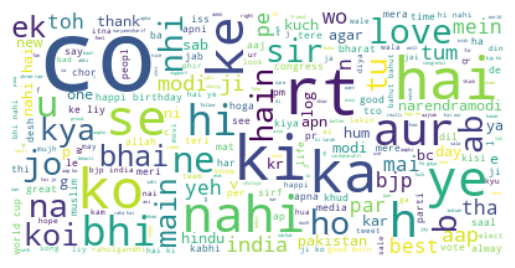

In [5]:
!pip install wordcloud
from wordcloud import WordCloud
text = " ".join([" ".join(tweet) for tweet in df["text"]])
wordcloud = WordCloud(max_font_size=80, max_words=250, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Extract the tweet text and target labels
X = df["text"]
y = df["sentiment"]

# Encode the labels as integers
y = y.replace({"positive": 2, "negative": 0, "neutral": 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the tweet text to numerical feature vectors using a count vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform([' '.join(tweet) for tweet in X_train])
X_test_vec = vectorizer.transform([' '.join(tweet) for tweet in X_test])

# Create a table to store the model names and accuracies
accuracy_table = pd.DataFrame(columns=["Model", "Accuracy", "Precision"])

# Train and evaluate a logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_vec, y_train)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression.predict(X_test_vec))
logistic_regression_precision = precision_score(y_test, logistic_regression.predict(X_test_vec), average = 'macro')
accuracy_table = accuracy_table.append({"Model": "logistic_regression", "Accuracy": logistic_regression_accuracy, "Precision": logistic_regression_precision}, ignore_index=True)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abhishek Mangotra\AppData\Local\Temp\ipykernel_6800\4171167338.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({"Model": "logistic_regression", "Accuracy": logistic_regression_accuracy, "Precision": logistic_regression_precision}, ignore_index=True)


In [7]:
# Train and evaluate a support vector machine model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_vec, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_vec))
svm_precision = precision_score(y_test, svm.predict(X_test_vec), average = 'macro')
accuracy_table = accuracy_table.append({"Model": "SVM", "Accuracy": svm_accuracy, "Precision": svm_precision}, ignore_index=True)

C:\Users\Abhishek Mangotra\AppData\Local\Temp\ipykernel_6800\2134270076.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({"Model": "SVM", "Accuracy": svm_accuracy, "Precision": svm_precision}, ignore_index=True)


In [8]:
# Train and evaluate a random forest model
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_vec, y_train)
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test_vec))
random_forest_precision = precision_score(y_test, random_forest.predict(X_test_vec), average = 'macro')
accuracy_table = accuracy_table.append({"Model": "Random Forest", "Accuracy": random_forest_accuracy, "Precision": random_forest_precision}, ignore_index=True)

C:\Users\Abhishek Mangotra\AppData\Local\Temp\ipykernel_6800\4028414676.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({"Model": "Random Forest", "Accuracy": random_forest_accuracy, "Precision": random_forest_precision}, ignore_index=True)


In [9]:
# Train and evaluate a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_vec, y_train)
decision_tree_accuracy = accuracy_score(y_test, decision_tree.predict(X_test_vec))
decision_tree_precision = precision_score(y_test, decision_tree.predict(X_test_vec), average = 'macro')
accuracy_table = accuracy_table.append({"Model": "Decision Tree", "Accuracy": decision_tree_accuracy, "Precision": decision_tree_precision}, ignore_index=True)

C:\Users\Abhishek Mangotra\AppData\Local\Temp\ipykernel_6800\1201450648.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({"Model": "Decision Tree", "Accuracy": decision_tree_accuracy, "Precision": decision_tree_precision}, ignore_index=True)


In [10]:
# Train and evaluate a multinomial naive bayes model
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes.predict(X_test_vec))
naive_bayes_precision = precision_score(y_test, naive_bayes.predict(X_test_vec), average = 'macro')
accuracy_table = accuracy_table.append({"Model": "Naive Bayes", "Accuracy": naive_bayes_accuracy, "Precision": naive_bayes_precision}, ignore_index=True)

C:\Users\Abhishek Mangotra\AppData\Local\Temp\ipykernel_6800\1419897603.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({"Model": "Naive Bayes", "Accuracy": naive_bayes_accuracy, "Precision": naive_bayes_precision}, ignore_index=True)


In [11]:
print(accuracy_table)

                 Model  Accuracy  Precision
0  logistic_regression  0.616692   0.617975
1                  SVM  0.615175   0.620547
2        Random Forest  0.586950   0.603290
3        Decision Tree  0.509863   0.511901
4          Naive Bayes  0.603642   0.614429


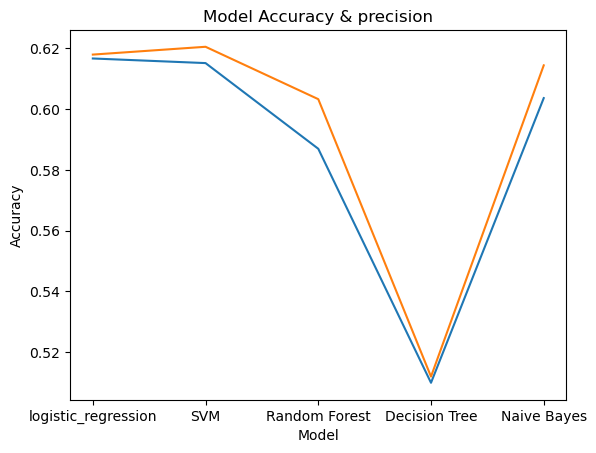

In [12]:
accuracy_values = accuracy_table["Accuracy"]
precision_values = accuracy_table["Precision"]

# create a line plot of the accuracy values
plt.plot(accuracy_table["Model"], accuracy_values, precision_values)

# add axis labels and a title to the plot
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy & precision")

# show the plot
plt.show()

In [13]:
# Train and evaluate a hybrid model model
from sklearn.ensemble import VotingClassifier
hybrid_model = VotingClassifier(estimators=[('lr', logistic_regression), ('svm', svm)], voting='hard')
hybrid_model.fit(X_train_vec, y_train)

hybrid_accuracy = accuracy_score(y_test, hybrid_model.predict(X_test_vec))
hybrid_precision = precision_score(y_test, hybrid_model.predict(X_test_vec), average = 'macro')
accuracy_table = accuracy_table.append({"Model": "Hybrid Model", "Accuracy": hybrid_accuracy, "Precision": hybrid_precision}, ignore_index=True)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abhishek Mangotra\AppData\Local\Temp\ipykernel_6800\841723120.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({"Model": "Hybrid Model", "Accuracy": hybrid_accuracy, "Precision": hybrid_precision}, ignore_index=True)


In [14]:
print(accuracy_table)

                 Model  Accuracy  Precision
0  logistic_regression  0.616692   0.617975
1                  SVM  0.615175   0.620547
2        Random Forest  0.586950   0.603290
3        Decision Tree  0.509863   0.511901
4          Naive Bayes  0.603642   0.614429
5         Hybrid Model  0.616692   0.621182


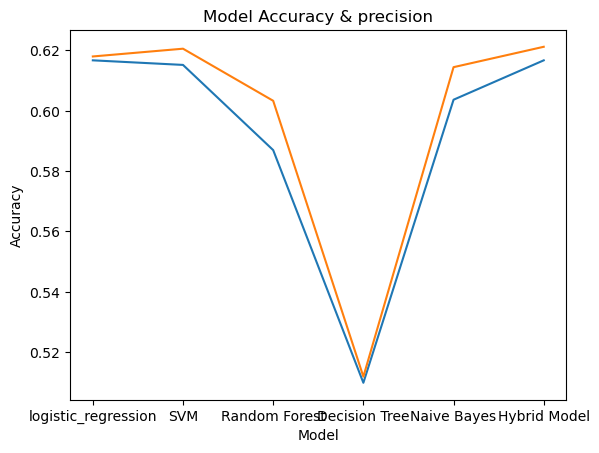

In [15]:
accuracy_values = accuracy_table["Accuracy"]
precision_values = accuracy_table["Precision"]

# create a line plot of the accuracy values
plt.plot(accuracy_table["Model"], accuracy_values, precision_values)

# add axis labels and a title to the plot
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy & precision")

# show the plot
plt.show()

# Prediction on the unlabelled #boycottbollywood dataset

In [16]:
#import the #boycottbollywood tweets dataset
df2 = pd.read_csv("Tweets.csv")
df2 = df2[df2['Tweet'].notna()]
df2

C:\Users\Abhishek Mangotra\AppData\Local\Temp\ipykernel_6800\1344559401.py:2: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("Tweets.csv")


,Unnamed: 0,Date,User,Tweet
0,0.0,2022-08-29 23:32:43+00:00,MauryanChanakya,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...
1,1.0,2022-08-29 23:28:45+00:00,Fragrancevelly,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki..."
2,2.0,2022-08-29 23:00:42+00:00,MomoDarling3,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...
3,3.0,2022-08-29 22:56:52+00:00,SanataniBong,@indiantweeter Can we shoot 153a(1) and 295a o...
4,4.0,2022-08-29 22:49:49+00:00,ChaiWithCharan_,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...
...,...,...,...,...
50993,50993.0,2022-08-17 01:52:17+00:00,Rkh90649388,Good morning warriors. \nMorning TL is out. Tw...
50994,50994.0,2022-08-17 01:52:13+00:00,KotiMadhav,#BoycottVikramVedha #BoycottbollywoodForever #...
50995,50995.0,2022-08-17 01:51:43+00:00,Rkh90649388,What Stopping CBI InSSRCase\n#BoycottBollywood...
50996,50996.0,2022-08-17 01:51:17+00:00,Helll000000,"लाज़िम है, हम भी देखेंगे! फिल्म नहीं, #Boycott..."


In [17]:
#dropping the unwanted columns
df2.drop(['Unnamed: 0', 'Date', 'User'], axis = 1, inplace = True)
df2

,Tweet
0,Never Emotional.\nBUT THIS MAKES ME SAD.\n#ISu...
1,"#SupportGemsofBollywood \n\nFrom A 2 Z , sabki..."
2,@taran_adarsh @NetflixIndia Hahahahaha @Netfli...
3,@indiantweeter Can we shoot 153a(1) and 295a o...
4,@simplepassive @aliaa08 @RANBIRKAPOORR Point t...
...,...
50993,Good morning warriors. \nMorning TL is out. Tw...
50994,#BoycottVikramVedha #BoycottbollywoodForever #...
50995,What Stopping CBI InSSRCase\n#BoycottBollywood...
50996,"लाज़िम है, हम भी देखेंगे! फिल्म नहीं, #Boycott..."


In [18]:
#preprocessing the dataset
import nltk
nltk.download('punkt')
def preprocess_tweet(tweet):
    if pd.isna(tweet):
        return ''
    # Remove hashtags, URLs, and mentions
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove punctuation and numbers
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)
    # Convert to lowercase and tokenize
    tweet = tweet.lower()
    tokens = nltk.word_tokenize(tweet)
    # Remove stop words
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    # Stem the tokens
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

df2['Tweet'] = df2['Tweet'].apply(preprocess_tweet)
df2

[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     Mangotra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweet
0,"[never, emot, make, sad]"
1,"[z, sabki]"
2,"[hahahahaha, still, get, fix, problem, honest,..."
3,"[shoot, charg, commun, disharmoni, instig, ri,..."
4,"[point, taken]"
...,...
50993,"[good, morn, warrior, morn, tl, tweet, retweet..."
50994,[]
50995,"[stop, cbi, inssrcas]"
50996,[]


In [19]:
texts = df2['Tweet'].tolist()
texts_transformed = vectorizer.transform([' '.join(tweet) for tweet in texts])

# Use the trained model to make predictions
predictions = logistic_regression.predict(texts_transformed)

# Decode the predictions back to original labels
predictions = pd.Series(predictions).replace({2: "positive", 0: "negative", 1: "neutral"})

# Add a new column to the unlabeled data dataset with the predicted sentiment
df2["sentiment"] = predictions

# Save the updated dataset
df2.to_csv("tweets_with_sentiment.csv", index=False)

In [20]:
df3 = pd.read_csv("tweets_with_sentiment.csv")
df3

,Tweet,sentiment
0,"['never', 'emot', 'make', 'sad']",neutral
1,"['z', 'sabki']",neutral
2,"['hahahahaha', 'still', 'get', 'fix', 'problem...",neutral
3,"['shoot', 'charg', 'commun', 'disharmoni', 'in...",neutral
4,"['point', 'taken']",neutral
...,...,...
50993,"['good', 'morn', 'warrior', 'morn', 'tl', 'twe...",neutral
50994,[],neutral
50995,"['stop', 'cbi', 'inssrcas']",neutral
50996,[],neutral


In [21]:
df3['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

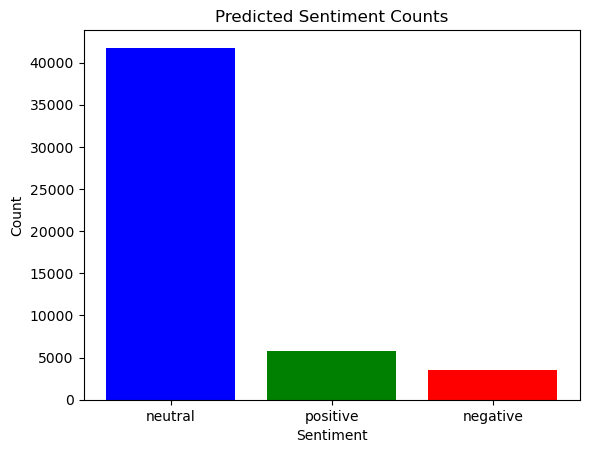

In [22]:
# Count the number of occurrences of each sentiment
sentiment_counts = df3['sentiment'].value_counts()

# Define a color mapping for each sentiment
color_mapping = {'positive': 'g', 'negative': 'r', 'neutral': 'b'}
colors = [color_mapping[sentiment] for sentiment in sentiment_counts.index]

# Plot the sentiment counts as a bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Predicted Sentiment Counts")
plt.show()

In [23]:
#using svc model
predictions = svm.predict(texts_transformed)

# Decode the predictions back to original labels
predictions = pd.Series(predictions).replace({2: "positive", 0: "negative", 1: "neutral"})

# Add a new column to the unlabeled data dataset with the predicted sentiment
df2["sentiment"] = predictions

# Save the updated dataset
df2.to_csv("svm_predicted.csv", index=False)

In [24]:
df3 = pd.read_csv("svm_predicted.csv")
df3.head()

,Tweet,sentiment
0,"['never', 'emot', 'make', 'sad']",neutral
1,"['z', 'sabki']",neutral
2,"['hahahahaha', 'still', 'get', 'fix', 'problem...",neutral
3,"['shoot', 'charg', 'commun', 'disharmoni', 'in...",neutral
4,"['point', 'taken']",neutral


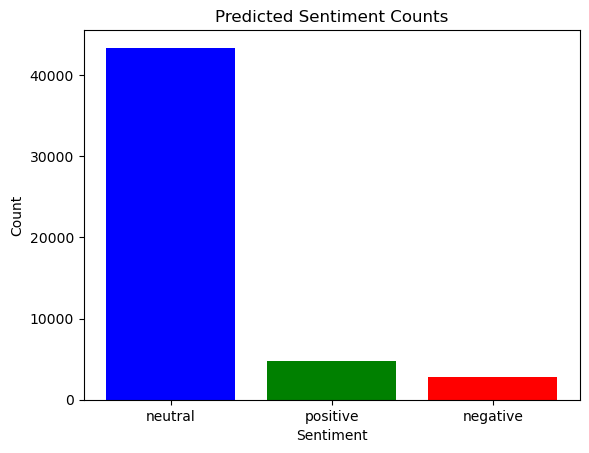

In [25]:
# Count the number of occurrences of each sentiment
sentiment_counts = df3['sentiment'].value_counts()

# Define a color mapping for each sentiment
color_mapping = {'positive': 'g', 'negative': 'r', 'neutral': 'b'}
colors = [color_mapping[sentiment] for sentiment in sentiment_counts.index]

# Plot the sentiment counts as a bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Predicted Sentiment Counts")
plt.show()

In [26]:
#using svc model
predictions = random_forest.predict(texts_transformed)

# Decode the predictions back to original labels
predictions = pd.Series(predictions).replace({2: "positive", 0: "negative", 1: "neutral"})

# Add a new column to the unlabeled data dataset with the predicted sentiment
df2["sentiment"] = predictions

# Save the updated dataset
df2.to_csv("random_forest_predicted.csv", index=False)

In [27]:
df3 = pd.read_csv("random_forest_predicted.csv")
df3.head()

,Tweet,sentiment
0,"['never', 'emot', 'make', 'sad']",neutral
1,"['z', 'sabki']",neutral
2,"['hahahahaha', 'still', 'get', 'fix', 'problem...",neutral
3,"['shoot', 'charg', 'commun', 'disharmoni', 'in...",neutral
4,"['point', 'taken']",neutral


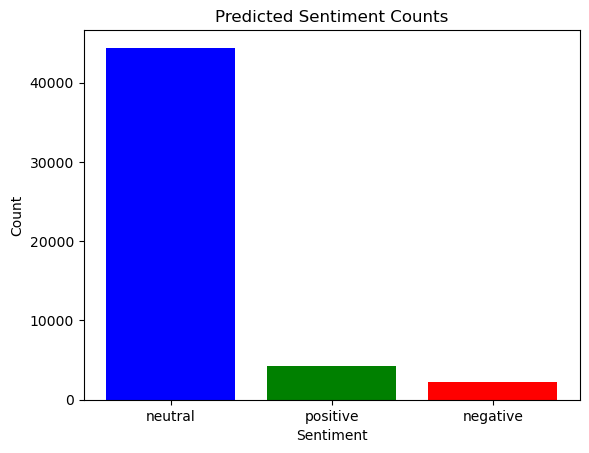

In [28]:
# Count the number of occurrences of each sentiment
sentiment_counts = df3['sentiment'].value_counts()

# Define a color mapping for each sentiment
color_mapping = {'positive': 'g', 'negative': 'r', 'neutral': 'b'}
colors = [color_mapping[sentiment] for sentiment in sentiment_counts.index]

# Plot the sentiment counts as a bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Predicted Sentiment Counts")
plt.show()

In [30]:
#using decision tree model
predictions = decision_tree.predict(texts_transformed)

# Decode the predictions back to original labels
predictions = pd.Series(predictions).replace({2: "positive", 0: "negative", 1: "neutral"})

# Add a new column to the unlabeled data dataset with the predicted sentiment
df2["sentiment"] = predictions

# Save the updated dataset
df2.to_csv("decision_tree_predicted.csv", index=False)

In [31]:
df3 = pd.read_csv("decision_tree_predicted.csv")
df3.head()

,Tweet,sentiment
0,"['never', 'emot', 'make', 'sad']",neutral
1,"['z', 'sabki']",neutral
2,"['hahahahaha', 'still', 'get', 'fix', 'problem...",negative
3,"['shoot', 'charg', 'commun', 'disharmoni', 'in...",neutral
4,"['point', 'taken']",neutral


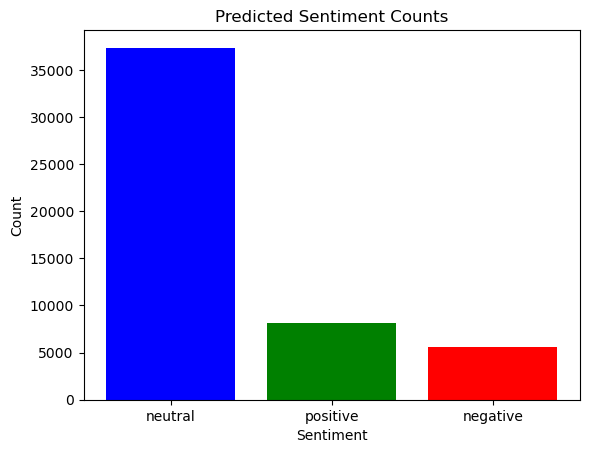

In [32]:
# Count the number of occurrences of each sentiment
sentiment_counts = df3['sentiment'].value_counts()

# Define a color mapping for each sentiment
color_mapping = {'positive': 'g', 'negative': 'r', 'neutral': 'b'}
colors = [color_mapping[sentiment] for sentiment in sentiment_counts.index]

# Plot the sentiment counts as a bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Predicted Sentiment Counts")
plt.show()

In [33]:
#using multinomial naive bayes model
predictions = naive_bayes.predict(texts_transformed)

# Decode the predictions back to original labels
predictions = pd.Series(predictions).replace({2: "positive", 0: "negative", 1: "neutral"})

# Add a new column to the unlabeled data dataset with the predicted sentiment
df2["sentiment"] = predictions

# Save the updated dataset
df2.to_csv("naive_bayes_predicted.csv", index=False)

In [34]:
df3 = pd.read_csv("decision_tree_predicted.csv")
df3.head()

,Tweet,sentiment
0,"['never', 'emot', 'make', 'sad']",neutral
1,"['z', 'sabki']",neutral
2,"['hahahahaha', 'still', 'get', 'fix', 'problem...",negative
3,"['shoot', 'charg', 'commun', 'disharmoni', 'in...",neutral
4,"['point', 'taken']",neutral


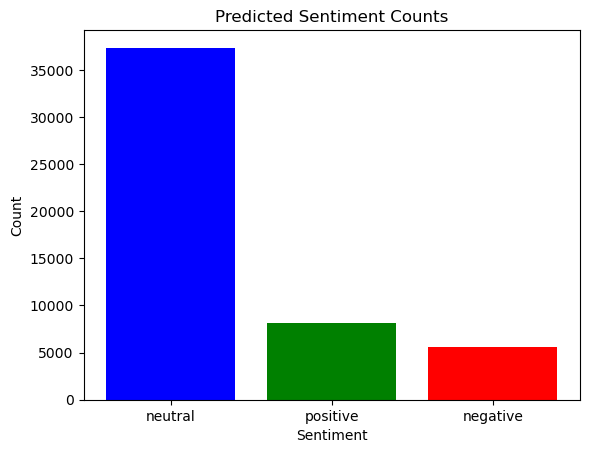

In [35]:
# Count the number of occurrences of each sentiment
sentiment_counts = df3['sentiment'].value_counts()

# Define a color mapping for each sentiment
color_mapping = {'positive': 'g', 'negative': 'r', 'neutral': 'b'}
colors = [color_mapping[sentiment] for sentiment in sentiment_counts.index]

# Plot the sentiment counts as a bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Predicted Sentiment Counts")
plt.show()

In [43]:
# Use the hybrid model to make predictions
predictions = hybrid_model.predict(texts_transformed)

# Decode the predictions back to original labels
predictions = pd.Series(predictions).replace({2: "positive", 0: "negative", 1: "neutral"})

# Add a new column to the unlabeled data dataset with the predicted sentiment
df2["sentiment"] = predictions

# Save the updated dataset
df2.to_csv("hybrid_generated.csv", index=False)

In [45]:
df3 = pd.read_csv("hybrid_generated.csv")
df3.head()

,Tweet,sentiment
0,"['never', 'emot', 'make', 'sad']",neutral
1,"['z', 'sabki']",neutral
2,"['hahahahaha', 'still', 'get', 'fix', 'problem...",neutral
3,"['shoot', 'charg', 'commun', 'disharmoni', 'in...",neutral
4,"['point', 'taken']",neutral


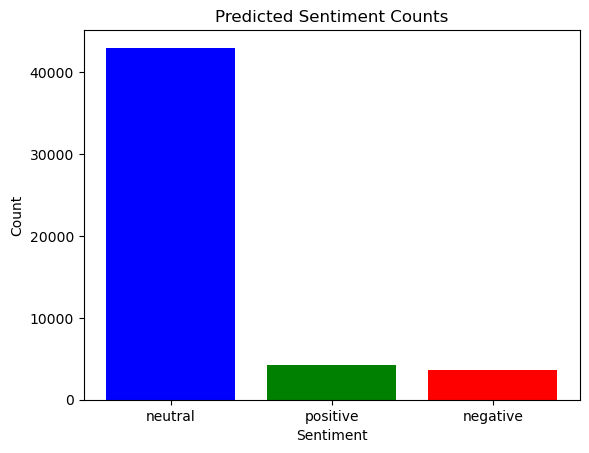

In [46]:
# Count the number of occurrences of each sentiment
sentiment_counts = df3['sentiment'].value_counts()

# Define a color mapping for each sentiment
color_mapping = {'positive': 'g', 'negative': 'r', 'neutral': 'b'}
colors = [color_mapping[sentiment] for sentiment in sentiment_counts.index]

# Plot the sentiment counts as a bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Predicted Sentiment Counts")
plt.show()

In [47]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Best parameters:  {'C': 1, 'penalty': 'l2'}
Best accuracy:  0.6107905716498749


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
